# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

import warnings


%matplotlib inline

In [2]:
#Suppress MC Simulation warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)


# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
# YOUR CODE HERE

monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Display the response data
print(json.dumps(btc_response, indent=4, sort_keys=True))

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE


{
    "data": {
        "1": {
            "circulating_supply": 19344737,
            "id": 1,
            "last_updated": 1681354452,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 583926948328,
                    "percent_change_1h": 0.306841987954881,
                    "percent_change_24h": 0.913176627572154,
                    "percent_change_7d": 7.04009378416683,
                    "percentage_change_1h": 0.306841987954881,
                    "percentage_change_24h": 0.913176627572154,
                    "percentage_change_7d": 7.04009378416683,
                    "price": 30182.0,
                    "volume_24h": 17273257386
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19344737,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencie

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Display the response data
print(json.dumps(eth_response, indent=4, sort_keys=True))



# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE


{
    "data": {
        "1027": {
            "circulating_supply": 120437016,
            "id": 1027,
            "last_updated": 1681354458,
            "max_supply": 120437016,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 229979602058,
                    "percent_change_1h": 0.0371111800347702,
                    "percent_change_24h": 2.50352260042886,
                    "percent_change_7d": -0.0689873462724858,
                    "percentage_change_1h": 0.0371111800347702,
                    "percentage_change_24h": 2.50352260042886,
                    "percentage_change_7d": -0.0689873462724858,
                    "price": 1910.02,
                    "volume_24h": 12745081580
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120437016,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "nu

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]


# Print the current price of BTC
print(f"The current price of BTC is ${btc_price:,.2f}")
# YOUR CODE HERE


The current price of BTC is $30,182.00


In [9]:
# Navigate the BTC response object to access the current price of ETH

eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
print(f"The current price of ETH is ${eth_price:,.2f}")
# YOUR CODE HERE


The current price of ETH is $1,910.02


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins 


# Print current value of your holding in BTC
print(f"The current value of your {btc_coins} BTC is ${btc_value:,.2f}")



The current value of your 1.2 BTC is $36,218.40


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
print(f"The current value of your {eth_coins} ETH is ${eth_value:,.2f}")




The current value of your 5.3 ETH is $10,123.11


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value


# Print current cryptocurrency wallet balance
print(f"The total value of your cryptocurrency wallet is ${total_crypto_wallet:,.2f}")



The total value of your cryptocurrency wallet is $46,341.51


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [15]:
# Helpful function to get a nicely formatted df from a list of tickers

def get_price_df(tickers, start_date, end_date, timeframe):

    raw_df = alpaca.get_bars(tickers, timeframe, start=start_date, end=end_date).df
    df_dict = {}

    for ticker in tickers:
        df_dict[ticker] = raw_df[raw_df['symbol']==ticker].drop('symbol', axis=1)


    output_df = pd.concat(list(df_dict.values()), axis=1, keys=list(df_dict.keys()))

    return output_df

    

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [16]:
# Set the tickers for both the bond and stock portion of the portfolio
# YOUR CODE HERE

tickers = ["AGG", "SPY"]
timeframe = "1Day"

today = pd.Timestamp.today()

if(today.weekday() == 6):
    today = today - pd.Timedelta("2 days")
elif(today.weekday() == 5):
    today = today - pd.Timedelta("1 days")

today =  pd.Timestamp(year=today.year, month=today.month, day = today.day, tz="America/New_York")

start_date = today.isoformat()



#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [17]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# YOUR CODE HERE

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE

# Concatenate the ticker DataFrames
# YOUR CODE HERE


price_df = get_price_df(tickers, start_date, start_date, timeframe)
# Review the first 5 rows of the Alpaca DataFrame

price_df.head()
# YOUR CODE HERE


AGG                                            \
                             open   high    low  close   volume trade_count   
timestamp                                                                     
2023-04-12 04:00:00+00:00  100.17  100.2  99.62  99.93  6595521       33108   

                                        SPY                                    \
                               vwap    open    high     low   close    volume   
timestamp                                                                       
2023-04-12 04:00:00+00:00  99.88138  411.87  412.17  407.44  408.05  83521383   

                                                   
                          trade_count        vwap  
timestamp                                          
2023-04-12 04:00:00+00:00      615302  409.702998

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [18]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = price_df["AGG"]["close"][0]


# Print the AGG closing price
# YOUR CODE HERE
print(f"AGG closing price: ${agg_close_price:,.2f}")




AGG closing price: $99.93


In [19]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = price_df["SPY"]["close"][0]

# Print the SPY closing price
# YOUR CODE HERE

print(f"SPY closing price: ${spy_close_price:,.2f}")



SPY closing price: $408.05


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [20]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares
# Print the current value of the bond portfolio

print(f"The current value of the AGG holding are ${agg_value:,.2f}")

# YOUR CODE HERE


The current value of the AGG holding are $19,986.00


In [21]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio

print(f"The current value of the SPY holding are ${spy_value:,.2f}")



The current value of the SPY holding are $44,885.50


In [22]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
# YOUR CODE HERE

print(f"The total value of the stock and bond portion is ${total_stocks_bonds:,.2f}")




The total value of the stock and bond portion is $64,871.50


In [23]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
print(f"The total value of the crypto portfolio is ${total_crypto_wallet:,.2f}")
print(f"The total value of the stock and bond portfolio is ${total_stocks_bonds:,.2f}")
print(f"The total value of the entire portfolio is ${total_portfolio:,.2f}")



The total value of the crypto portfolio is $46,341.51
The total value of the stock and bond portfolio is $64,871.50
The total value of the entire portfolio is $111,213.01


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [24]:
# Consolidate financial assets data into a Python list
# YOUR CODE HERE

savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
print(savings_data)
# YOUR CODE HERE
    

[46341.506, 64871.5]


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [25]:
# Create a Pandas DataFrame called savings_df 
# YOUR CODE HERE

savings_df = pd.DataFrame(savings_data, index = ["crypto", "stocks"], columns = ["amount"])

# Display the savings_df DataFrame
# YOUR CODE HERE
print(savings_df)

           amount
crypto  46341.506
stocks  64871.500


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<Axes: title={'center': 'Portfolio Composition'}, ylabel='amount'>

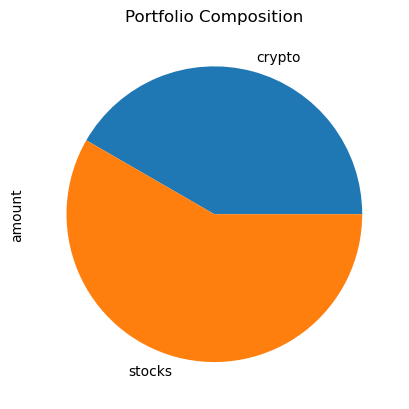

In [26]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart

savings_df.plot.pie(y="amount", title="Portfolio Composition" ,legend=False)

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [27]:
# Create a variable named emergency_fund_value
# YOUR CODE HERE

emergency_fund_value = 3 * monthly_income
print(f"Emergency fund value is ${emergency_fund_value:,.2f}")


Emergency fund value is $36,000.00


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [28]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:

if(total_portfolio > emergency_fund_value):
    print("Congratulations! You have enough money in your emergency fund.")
elif(total_portfolio == emergency_fund_value):
    print("Congratulations on reaching this financial goal!")
else:
    print(f"You are ${abs(emergency_fund_value - total_portfolio):.2f} away from reaching your goal")


Congratulations! You have enough money in your emergency fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [29]:
# YOUR CODE HERE

end_date = today.isoformat()
start_date = (today - pd.DateOffset(years=3)).isoformat()


price_df = get_price_df(tickers, start_date, end_date, timeframe)

<Axes: title={'center': 'SPY vs AGG returns'}, ylabel='Frequency'>

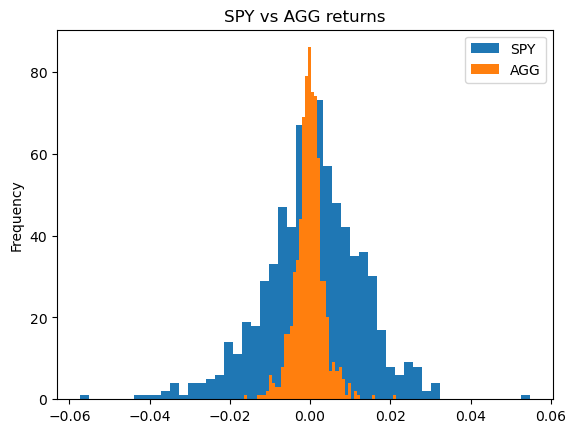

In [30]:
spy_return_distribution = price_df["SPY"]["close"].pct_change().dropna()
agg_return_distribution = price_df["AGG"]["close"].pct_change().dropna()

ax = spy_return_distribution.plot.hist(bins=50, title="SPY vs AGG returns",legend=True,label="SPY")
agg_return_distribution.plot.hist(ax=ax,bins=50, legend=True, label="AGG")


<Axes: title={'center': 'SPY vs AGG cumulative returns'}, xlabel='timestamp'>

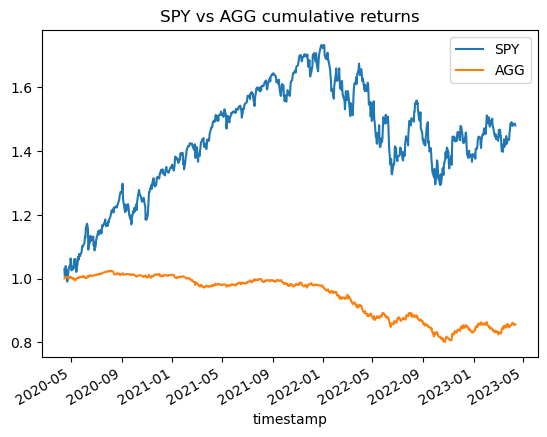

In [31]:

spy_cumulative_return = (spy_return_distribution + 1).cumprod()
agg_cumulative_return = (agg_return_distribution + 1).cumprod()

ax = spy_cumulative_return.plot(title="SPY vs AGG cumulative returns",legend=True,label="SPY")
agg_cumulative_return.plot(ax=ax,legend=True,label="AGG")


#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [32]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# YOUR CODE HERE

MC_6040 = MCSimulation(
    portfolio_data = price_df,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30)

# Printing the first five rows of the simulation input data
MC_6040.portfolio_data.head()

# Review the simulation input data
# YOUR CODE HERE


AGG                                      \
                             open     high       low   close   volume   
timestamp                                                               
2020-04-13 04:00:00+00:00  117.09  117.170  116.5308  116.70  5738262   
2020-04-14 04:00:00+00:00  116.99  117.000  116.5850  116.76  5506671   
2020-04-15 04:00:00+00:00  117.03  117.305  116.7100  117.24  4367410   
2020-04-16 04:00:00+00:00  117.19  117.525  117.1900  117.39  4744716   
2020-04-17 04:00:00+00:00  117.52  117.620  117.0350  117.25  4949824   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-04-13 04:00:00+00:00       24812  116.845817          NaN  277.14   
2020-04-14 04:00:00+00:00       23102  116.766750     0.000514  280.98   
2020-04-15 04:00:00+00:00       19620  117.144915     0.004111  277.57   
2020-04-16 04:00:00+00:00       16906  117.399687     0.001279  279.15   
2020-04-17 04:00:00+00:00       25621  117.358347    -0.001193  285.38   

                                                                              \
                               high       low   close     volume trade_count   
timestamp                                                                      
2020-04-13 04:00:00+00:00  277.5100  271.4100  275.63  114868253      752225   
2020-04-14 04:00:00+00:00  284.9000  275.5106  283.80  134143470      761246   
2020-04-15 04:00:00+00:00  283.9407  275.4600  277.75  121779042      711140   
2020-04-16 04:00:00+00:00  280.0300  275.7600  278.96  132398585      748801   
2020-04-17 04:00:00+00:00  287.3000  282.4000  286.54  146685294      699788   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-04-13 04:00:00+00:00  274.512847          NaN  
2020-04-14 04:00:00+00:00  282.089774     0.029641  
2020-04-15 04:00:00+00:00  277.826041    -0.021318  
2020-04-16 04:00:00+00:00  278.840675     0.004356  
2020-04-17 04:00:00+00:00  284.307868     0.027172

In [33]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE
MC_6040.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992245,0.997237,0.994499,0.999438,0.983511,0.999380,1.001412,0.999356,1.005507,1.004800,...,0.991839,0.992394,1.001882,1.003704,1.002185,0.993872,1.005247,1.007074,0.990079,1.001360
2,0.996023,0.996224,0.994886,0.995607,0.977239,0.994921,1.004326,1.010868,1.006996,1.004162,...,0.988691,0.998002,1.004068,1.000620,0.993765,0.987551,1.015390,1.012481,0.988764,0.993329
3,0.998984,0.995689,0.994852,0.983009,0.986538,1.000324,0.993020,1.023671,0.995443,0.999160,...,0.997110,0.983269,1.005273,1.000440,0.991649,0.986852,1.020533,1.005540,0.994480,0.996700
4,1.001899,0.990757,1.003682,0.988223,0.986858,1.000947,0.978203,1.028162,1.009758,1.005471,...,0.995367,0.977401,1.014196,0.988449,0.983850,0.981482,1.012492,1.001946,0.994650,0.989649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.690348,10.703225,1.786311,4.435683,5.870871,16.450935,14.825058,2.405563,6.633850,11.871811,...,3.687392,13.041450,3.420371,3.556971,5.339363,3.817154,8.424293,4.241891,6.458193,11.068191
7557,13.771031,10.768762,1.799011,4.406975,5.816248,16.506134,14.864296,2.405955,6.682056,11.884924,...,3.642143,12.992109,3.433438,3.514547,5.348158,3.784817,8.506132,4.276901,6.517494,10.978962
7558,13.689737,10.707104,1.808602,4.444292,5.872953,16.461972,14.910880,2.423441,6.608011,11.922803,...,3.692160,12.902648,3.454070,3.540789,5.314184,3.753488,8.420534,4.242586,6.584453,11.032359
7559,13.499452,10.682059,1.796563,4.413251,5.867471,16.185194,14.834634,2.454306,6.611699,11.886995,...,3.725006,12.887460,3.508314,3.503853,5.353385,3.793839,8.352480,4.204457,6.563292,11.031482


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

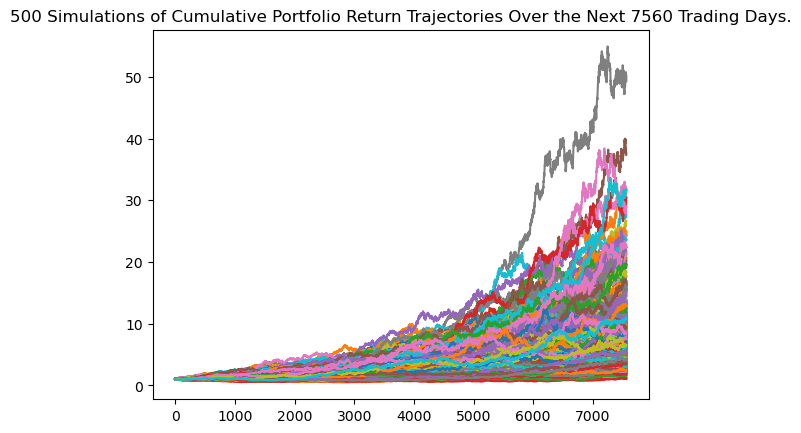

In [34]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
MC_6040.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

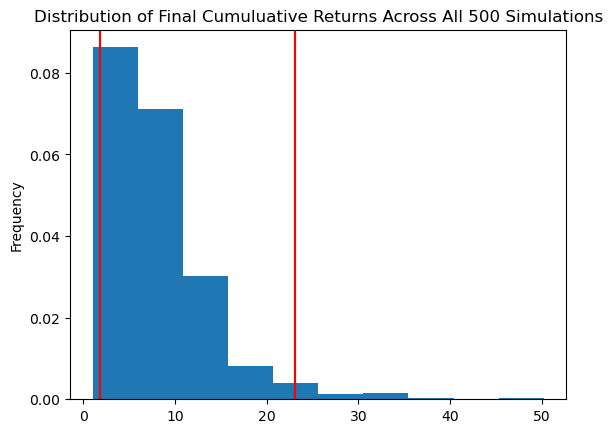

In [35]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE

MC_6040.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [36]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE

cum_return_table = MC_6040.summarize_cumulative_return()

print(cum_return_table)

# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE

count           500.000000
mean              8.114400
std               5.713043
min               1.046542
25%               4.439992
50%               6.665232
75%              10.349100
max              50.210543
95% CI Lower      1.793433
95% CI Upper     23.130197
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [37]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE

print( f"Loweer: ", cum_return_table["95% CI Lower"])
print( f"Upper: ", cum_return_table["95% CI Upper"])





Loweer:  1.7934334116633646
Upper:  23.13019688831756


In [38]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = cum_return_table["95% CI Lower"] * total_stocks_bonds
ci_upper_thirty_cumulative_return = cum_return_table["95% CI Upper"] * total_stocks_bonds

multiple_lower = cum_return_table["95% CI Lower"]
multiple_upper = cum_return_table["95% CI Upper"]
irr_lower = multiple_lower ** (1/30) - 1
irr_upper = multiple_upper ** (1/30) - 1

print( f"BTC Value: ${btc_value:,.2f}\nETH Value: ${eth_value:,.2f}\n---------------------")
print( f"Total Crypto Value: ${total_crypto_wallet:,.2f}\n\n")

print( f"AGG Value: ${agg_value:,.2f}\nSPY Value: ${spy_value:,.2f}\n---------------------")
print( f"Total Stock/Bond Value: ${total_stocks_bonds:,.2f}\n")

print( f"Total Portfolio Value: ${total_portfolio:,.2f}\n")

print( f"95% Conf Interval in 30 year projection (excluding crypto)\n")
print( f"Upper Bound: ${ci_upper_thirty_cumulative_return:,.2f} IRR: {irr_upper:.2%} Multiple: {multiple_upper:.1f}x")
print( f"Lower Bound: ${ci_lower_thirty_cumulative_return:,.2f} IRR: {irr_lower:.2%} Multiple: {multiple_lower:.1f}x")



# Print the result of your calculations
# YOUR CODE HERE


BTC Value: $36,218.40
ETH Value: $10,123.11
---------------------
Total Crypto Value: $46,341.51


AGG Value: $19,986.00
SPY Value: $44,885.50
---------------------
Total Stock/Bond Value: $64,871.50

Total Portfolio Value: $111,213.01

95% Conf Interval in 30 year projection (excluding crypto)

Upper Bound: $1,500,490.57 IRR: 11.04% Multiple: 23.1x
Lower Bound: $116,342.72 IRR: 1.97% Multiple: 1.8x


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [39]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE

MC_8020 = MCSimulation(
    portfolio_data = price_df,
    weights = [.2,.8],
    num_simulation = 500,
    num_trading_days = 252*10)

MC_8020.portfolio_data.head()

# Review the simulation input data
# YOUR CODE HERE


AGG                                      \
                             open     high       low   close   volume   
timestamp                                                               
2020-04-13 04:00:00+00:00  117.09  117.170  116.5308  116.70  5738262   
2020-04-14 04:00:00+00:00  116.99  117.000  116.5850  116.76  5506671   
2020-04-15 04:00:00+00:00  117.03  117.305  116.7100  117.24  4367410   
2020-04-16 04:00:00+00:00  117.19  117.525  117.1900  117.39  4744716   
2020-04-17 04:00:00+00:00  117.52  117.620  117.0350  117.25  4949824   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-04-13 04:00:00+00:00       24812  116.845817          NaN  277.14   
2020-04-14 04:00:00+00:00       23102  116.766750     0.000514  280.98   
2020-04-15 04:00:00+00:00       19620  117.144915     0.004111  277.57   
2020-04-16 04:00:00+00:00       16906  117.399687     0.001279  279.15   
2020-04-17 04:00:00+00:00       25621  117.358347    -0.001193  285.38   

                                                                              \
                               high       low   close     volume trade_count   
timestamp                                                                      
2020-04-13 04:00:00+00:00  277.5100  271.4100  275.63  114868253      752225   
2020-04-14 04:00:00+00:00  284.9000  275.5106  283.80  134143470      761246   
2020-04-15 04:00:00+00:00  283.9407  275.4600  277.75  121779042      711140   
2020-04-16 04:00:00+00:00  280.0300  275.7600  278.96  132398585      748801   
2020-04-17 04:00:00+00:00  287.3000  282.4000  286.54  146685294      699788   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-04-13 04:00:00+00:00  274.512847          NaN  
2020-04-14 04:00:00+00:00  282.089774     0.029641  
2020-04-15 04:00:00+00:00  277.826041    -0.021318  
2020-04-16 04:00:00+00:00  278.840675     0.004356  
2020-04-17 04:00:00+00:00  284.307868     0.027172

In [40]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE

MC_8020.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000276,1.003414,1.005383,0.994788,1.002467,1.000986,0.985903,1.010955,1.008323,0.996705,...,1.007012,0.997779,1.003030,1.005047,1.007891,0.982001,0.997983,0.993890,1.014529,1.004566
2,1.008183,0.997602,1.000808,0.997921,0.989307,0.996414,0.975929,1.015978,1.008069,1.015990,...,0.993290,1.008746,0.995317,1.005645,1.011419,0.972830,1.008953,0.983457,1.027188,1.003980
3,1.021155,0.983521,1.012460,0.981683,0.997162,1.002189,0.993752,0.996257,1.015103,1.022309,...,0.983251,1.008290,0.991700,0.998289,1.014241,0.972687,0.985947,0.978845,1.032179,0.990184
4,1.024508,0.991441,1.030027,0.974854,0.992705,1.012532,1.017870,1.006452,1.030925,1.011908,...,0.980279,1.017019,1.007474,0.991961,1.024932,0.970806,0.976227,0.974483,1.018932,0.986134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.756272,1.432030,4.560596,3.807270,1.001333,2.304215,2.434678,1.985222,3.661100,7.415737,...,1.526574,3.446530,3.887128,1.336417,2.150418,3.029829,4.528596,2.610200,1.826648,3.777885
2517,1.758629,1.418183,4.564536,3.842945,1.005427,2.289397,2.411652,1.979787,3.587415,7.344326,...,1.527530,3.435891,3.840666,1.328149,2.164499,3.024468,4.611917,2.629691,1.840509,3.760942
2518,1.741017,1.401965,4.471385,3.840270,1.005830,2.276876,2.425935,1.998412,3.566990,7.305379,...,1.515759,3.438918,3.810952,1.322435,2.166313,3.001399,4.653978,2.653636,1.842017,3.746585
2519,1.742394,1.399796,4.497004,3.852763,1.002451,2.289825,2.443820,2.009802,3.559222,7.162176,...,1.512251,3.444743,3.849975,1.317837,2.161638,2.996191,4.651354,2.693352,1.815710,3.757132


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

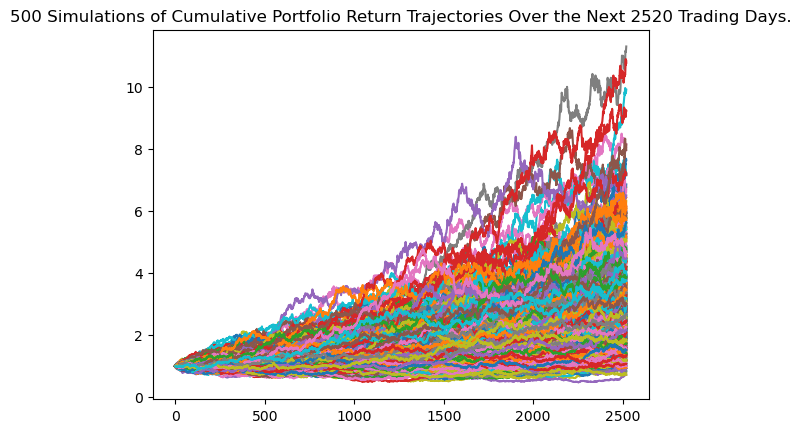

In [41]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE

MC_8020.plot_simulation()


<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

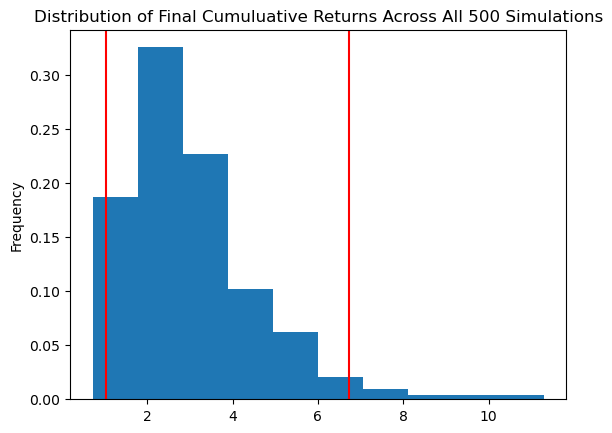

In [42]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE

MC_8020.plot_distribution()

In [43]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE

cum_return_table_10 = MC_8020.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE
print(cum_return_table_10)

count           500.000000
mean              3.027814
std               1.550135
min               0.726591
25%               1.972775
50%               2.697248
75%               3.665470
max              11.290485
95% CI Lower      1.026328
95% CI Upper      6.723739
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [44]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE

ci_lower_thirty_cumulative_return_10 = cum_return_table_10["95% CI Lower"] * total_stocks_bonds
ci_upper_thirty_cumulative_return_10 = cum_return_table_10["95% CI Upper"] * total_stocks_bonds

multiple_lower = cum_return_table_10["95% CI Lower"]
multiple_upper = cum_return_table_10["95% CI Upper"]
irr_lower_10 = multiple_lower ** (1/10) - 1
irr_upper_10 = multiple_upper ** (1/10) - 1


print( f"BTC Value: ${btc_value:,.2f}\nETH Value: ${eth_value:,.2f}\n---------------------")
print( f"Total Crypto Value: ${total_crypto_wallet:,.2f}\n\n")

print( f"AGG Value: ${agg_value:,.2f}\nSPY Value: ${spy_value:,.2f}\n---------------------")
print( f"Total Stock/Bond Value: ${total_stocks_bonds:,.2f}\n")

print( f"Total Portfolio Value: ${total_portfolio:,.2f}\n")
print( f"95% Conf Interval in 10 year projection (excludes crypto)\n-------------------------------------")
print( f"Upper Bound: ${ci_upper_thirty_cumulative_return_10:,.2f} IRR: {irr_upper_10:.2%} Multiple: {multiple_upper:.1f}x")
print( f"Lower Bound: ${ci_lower_thirty_cumulative_return_10:,.2f} IRR: {irr_lower_10:.2%} Multiple: {multiple_lower:.1f}x")




BTC Value: $36,218.40
ETH Value: $10,123.11
---------------------
Total Crypto Value: $46,341.51


AGG Value: $19,986.00
SPY Value: $44,885.50
---------------------
Total Stock/Bond Value: $64,871.50

Total Portfolio Value: $111,213.01

95% Conf Interval in 10 year projection (excludes crypto)
-------------------------------------
Upper Bound: $436,179.06 IRR: 20.99% Multiple: 6.7x
Lower Bound: $66,579.47 IRR: 0.26% Multiple: 1.0x


In [45]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
#ci_lower_ten_cumulative_return = # YOUR CODE HERE
#ci_upper_ten_cumulative_return = # YOUR CODE HERE

# Print the result of your calculations
# YOUR CODE HERE


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?